In [1]:
%pylab inline
import numpy as np
from scipy.special import ellipk as K
from scipy.optimize import fsolve as solve

Populating the interactive namespace from numpy and matplotlib


In [2]:
materials = []

In [3]:
RO4003C = {"name": "RO4003C",
      "eps": 3.38}

RO4350B = {"name": "RO4350B",
      "eps": 3.48}

ArlonAD10001 = {"name": "Arlon AD1000 508 mc m",
      "eps": 10.0}

ArlonAD10002 = {"name": "Arlon AD1000 635 mc m",
      "eps": 10.2}

ArlonAD10003 = {"name": "Arlon AD1000 1270 mc m",
      "eps": 10.6}

ArlonTC600 = {"name": "Arlon TC600",
      "eps": 6.15}

ArlonAD250 = {"name": "Arlon AD250",
      "eps": 2.5}

ArlonAD255C = {"name": "Arlon AD255C",
      "eps": 2.55}

RO30031 = {"name": "RO3003",
      "eps": 3.0}

materials.append([RO4003C, RO4350B, ArlonAD10001, ArlonAD10002, ArlonAD10003,
                  ArlonTC600, ArlonAD250, ArlonAD255C, RO30031])
print(materials)

[[{'name': 'RO4003C', 'eps': 3.38}, {'name': 'RO4350B', 'eps': 3.48}, {'name': 'Arlon AD1000 508 mc m', 'eps': 10.0}, {'name': 'Arlon AD1000 635 mc m', 'eps': 10.2}, {'name': 'Arlon AD1000 1270 mc m', 'eps': 10.6}, {'name': 'Arlon TC600', 'eps': 6.15}, {'name': 'Arlon AD250', 'eps': 2.5}, {'name': 'Arlon AD255C', 'eps': 2.55}, {'name': 'RO3003', 'eps': 3.0}]]


In [18]:
def fivewire_line_impedance(d, D, e):
    z0 = 120*2.5044*np.log(D/0.933/d)/np.sqrt(e)
    return z0

def fivewire_line_impedance_50(D, e, init_point = 100e-6):
    def func(d, D, e):
        return fivewire_line_impedance(d, D, e) - 50.
    d = solve(func, init_point, args = (D, e), xtol = 1e-12, maxfev = 1000)[0]
    return d

fivewire_line_impedance_50_vec = np.vectorize(fivewire_line_impedance_50)

In [19]:
d = fivewire_line_impedance_50(1000e-6, 10, 10e-6)
fivewire_line_impedance(d, 1000e-6, 10)

50.0

In [41]:
def fivewire_line_analyse(work_array, D):
    d = D
    name = np.array([])
    for mat in work_array[0]:
        d_loc = fivewire_line_impedance_50_vec(D, mat['eps'])
        d = np.vstack([d, d_loc])
        name = np.append(name, str(mat['name']) + ", " + str(mat['eps']))

    d = d[1:]
    
    fig, ax = plt.subplots()
    for i in range(0, len(d)):
        ax.plot(D*np.sqrt(2)/2*1e6-d[i]*1e6, d[i]*1e6+D*1e6, label = name[i])
    plt.legend(loc = 'lower right', fontsize = 'small')
    ax.grid(True)

    ax.set_xlabel(r'$D*\sqrt{2}/2-d, \mu m$',fontsize = 'large')
    ax.set_ylabel(r'$d+D, \mu m$',fontsize = 'large')



    fig.set_figwidth(21/3)    
    fig.set_figheight(7)
#     fig.savefig('5wire analysis', dpi = 200)
    plt.show()

In [42]:
D = np.linspace(100, 2000, 500)*1e-6

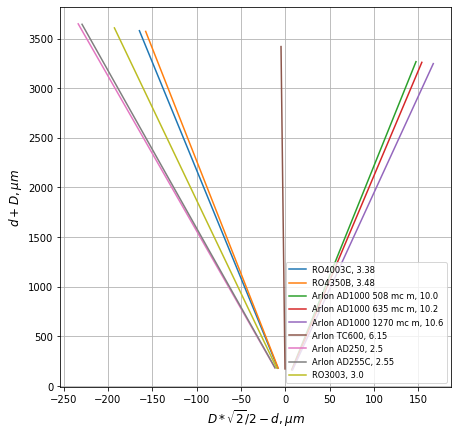

In [43]:
fivewire_line_analyse(materials, D)